In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

# Hyperparameters
SEED = 5388

key = jax.random.PRNGKey(SEED)

# Utils

In [3]:
def word_to_matrix(word, corpus):
    # word: is a string of integers
    # corpus: is a list of matrices

    M = corpus[0].shape[0]

    # Convert word to sequence of integers
    word_seq = [int(letter) for letter in word]

    # Convert sequence of integers to matrix
    out = jnp.eye(M)
    for i in word_seq:
        out = out @ corpus[i]
    return out

def plot_eigenvalues_circle(corpus):
    
    # Plot the eigenvalues of the corpus on a unit circle
    for matrix, label in corpus:
        eigs = jnp.linalg.eigvals(matrix)
        plt.scatter(eigs.real, eigs.imag, label=label)
    # plot a unit circle
    t = jnp.linspace(0, 2*jnp.pi, 100)
    plt.plot(jnp.cos(t), jnp.sin(t), color='black')
    plt.title("Eigenvalues")
    plt.legend()
    plt.show()

def plot_M1_M2T(word_pairs, corpus):

    k = len(word_pairs)
    fig, axes = plt.subplots(1, k, figsize=(12, 6))
    for i in range(k):
        if len(word_pairs[i]) == 2:
            sns.heatmap(word_to_matrix(word_pairs[i][0], corpus) @ word_to_matrix(word_pairs[i][1], corpus).T, ax=axes[i])
            axes[i].set_title(f"{word_pairs[i][0]} @ {word_pairs[i][1]}^T")
        elif word_pairs[i][-1] == "Id":
            sns.heatmap(word_to_matrix(word_pairs[i][0], corpus) @ word_to_matrix(word_pairs[i][1], corpus).T - jnp.eye(corpus[0].shape[0]), ax=axes[i])
            axes[i].set_title(f"{word_pairs[i][0]} @ {word_pairs[i][1]}^T - Id")
    plt.show()


# Gaussian Baseline

## Dense

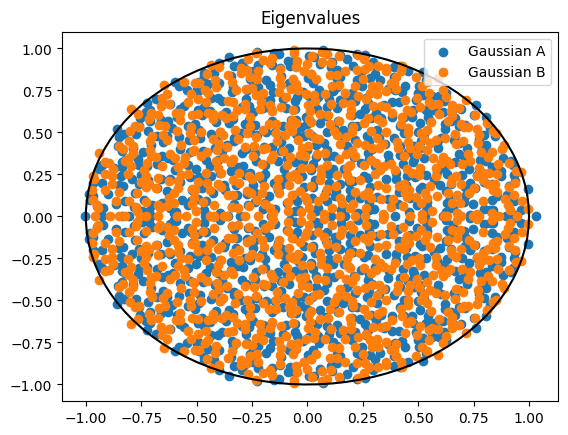

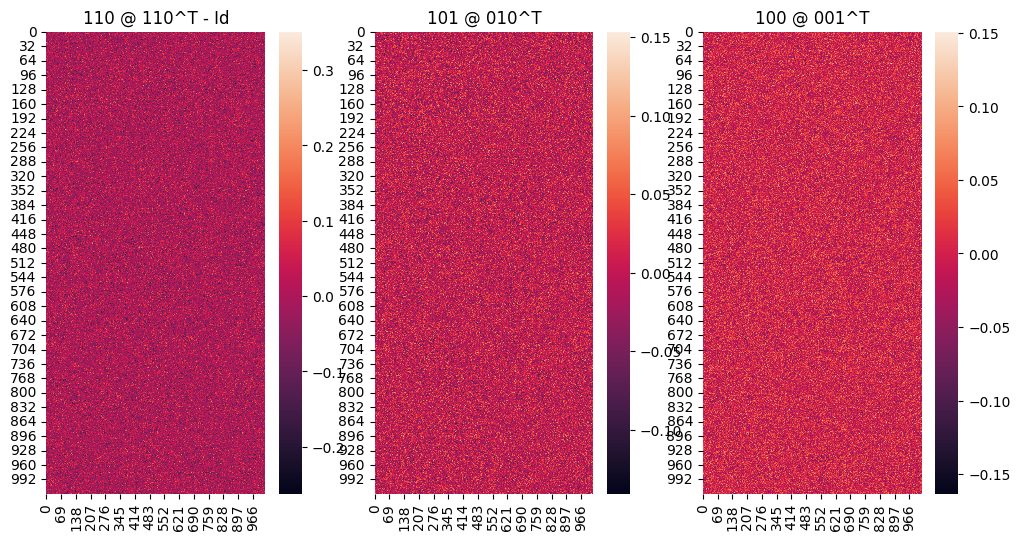

In [4]:
# Generate random gaussian matrix of size MxM
M = 2**10

key, key_A, key_B = jax.random.split(key, 3)
A_gaussian = 1/jnp.sqrt(M)*jax.random.normal(key_A, (M, M))
B_gaussian = 1/jnp.sqrt(M)*jax.random.normal(key_B, (M, M))

plot_eigenvalues_circle([(A_gaussian, "Gaussian A"), (B_gaussian, "Gaussian B")])

corpus = [A_gaussian, B_gaussian]
plot_M1_M2T([('110', '110', 'Id'), ('101', '010'), ('100', '001')], corpus)


## Block Diagonal

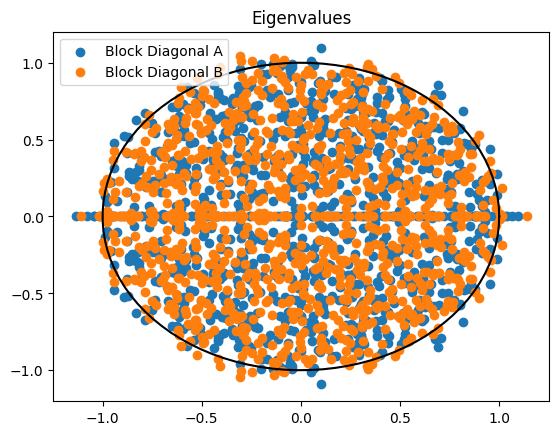

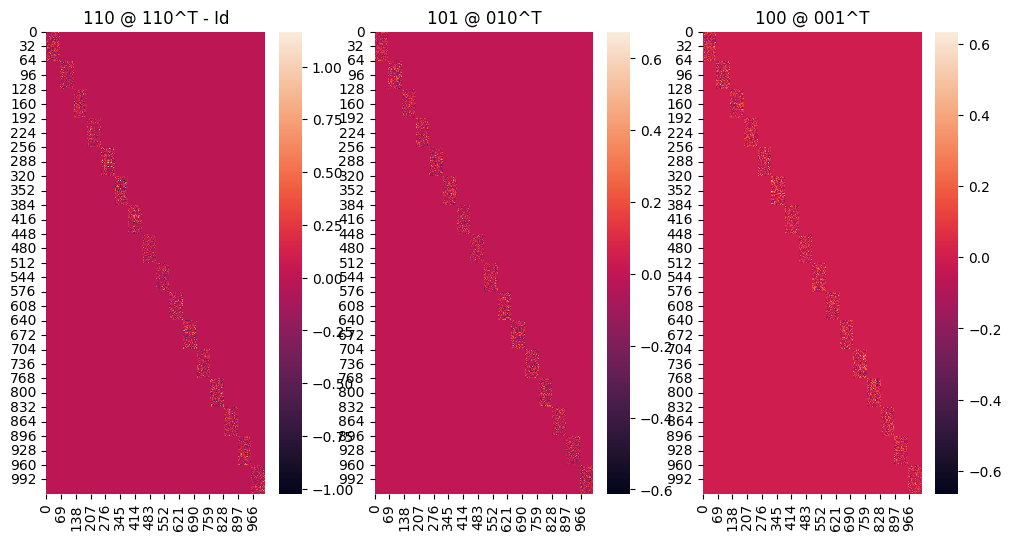

In [62]:
# Generate random gaussian matrix of size MxM
M = 2**10
b = 2**6
K = M//b

key, key_A, key_B = jax.random.split(key, 3)

## Create blocks
A_gaussian = 1/jnp.sqrt(b)*jax.random.normal(key_A, (K, b, b))
B_gaussian = 1/jnp.sqrt(b)*jax.random.normal(key_B, (K, b, b))

## Create block diagonal matrix
A_block_diagonal = jnp.zeros((M, M))
B_block_diagonal = jnp.zeros((M, M))
for i in range(K):
    A_block_diagonal = A_block_diagonal.at[i*b:(i+1)*b, i*b:(i+1)*b].set(A_gaussian[i])
    B_block_diagonal = B_block_diagonal.at[i*b:(i+1)*b, i*b:(i+1)*b].set(B_gaussian[i])

plot_eigenvalues_circle([(A_block_diagonal, "Block Diagonal A"), (B_block_diagonal, "Block Diagonal B")])

corpus = [A_block_diagonal, B_block_diagonal]
plot_M1_M2T([('110', '110', 'Id'), ('101', '010'), ('100', '001')], corpus)


# Hadamard

## Gaussian Diagonal

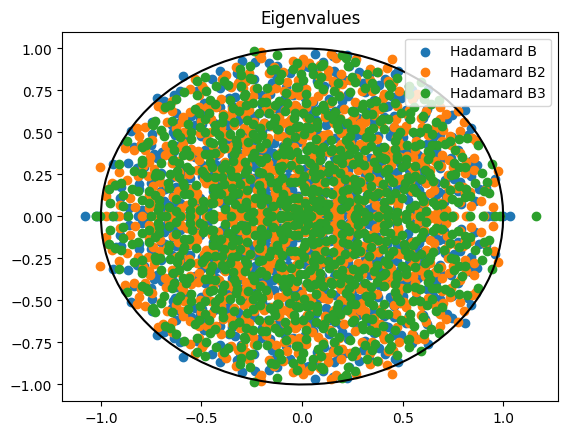

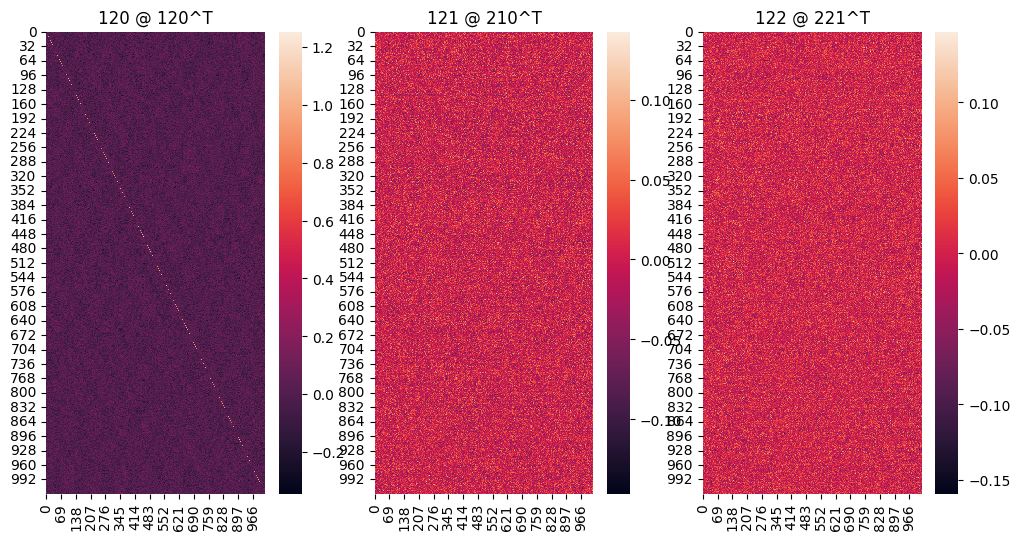

In [11]:
M = 2**10

H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, *keys_D = jax.random.split(key, 4)
D_1_gaussian = jax.random.normal(keys_D[0], (M,)) 
D_2_gaussian = jax.random.normal(keys_D[1], (M,)) 
D_3_gaussian = jax.random.normal(keys_D[2], (M,)) 

B = H @ jnp.diag(D_1_gaussian) 
B2 = H @ jnp.diag(D_2_gaussian) 
B3 = H @ jnp.diag(D_3_gaussian) 

plot_eigenvalues_circle([(B, "Hadamard B"), (B2, "Hadamard B2"), (B3, "Hadamard B3")])

corpus = [B, B2, B3]
plot_M1_M2T([('120', '120'), ('121', '210'), ('122', '221')], corpus)

## Tanh Diagonal

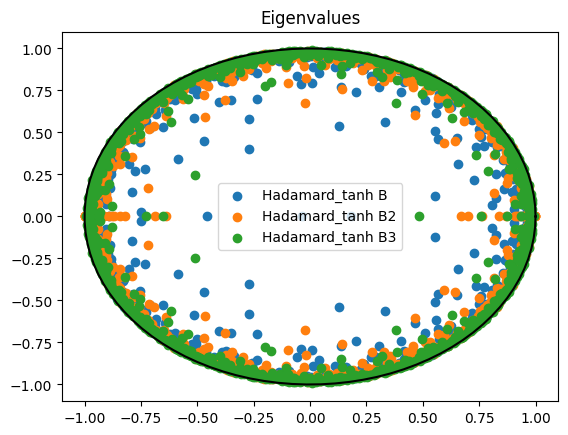

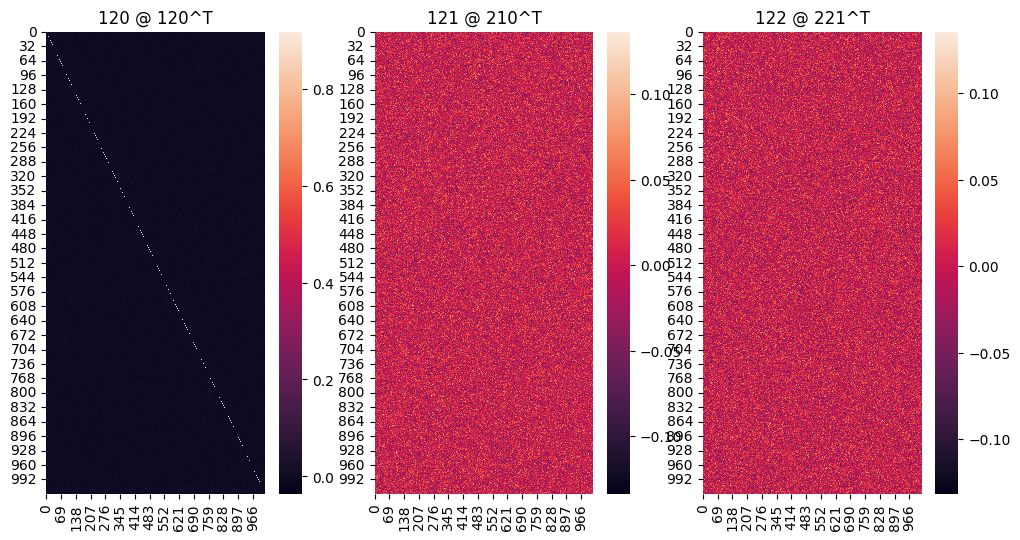

In [7]:
M = 2**10

H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, *keys_D = jax.random.split(key, 4)
D_1_gaussian = jax.random.normal(keys_D[0], (M,)) 
D_2_gaussian = jax.random.normal(keys_D[1], (M,)) 
D_3_gaussian = jax.random.normal(keys_D[2], (M,)) 

B = H @ jnp.diag(jnp.tanh(20*D_1_gaussian)) 
B2 = H @ jnp.diag(jnp.tanh(20*D_2_gaussian)) 
B3 = H @ jnp.diag(jnp.tanh(20*D_3_gaussian)) 

plot_eigenvalues_circle([(B, "Hadamard_tanh B"), (B2, "Hadamard_tanh B2"), (B3, "Hadamard_tanh B3")])

corpus = [B, B2, B3]
plot_M1_M2T([('120', '120'), ('121', '210'), ('122', '221')], corpus)

## Uniform Diagonal

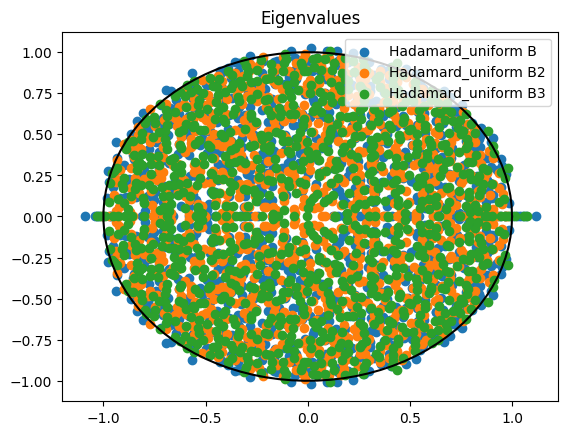

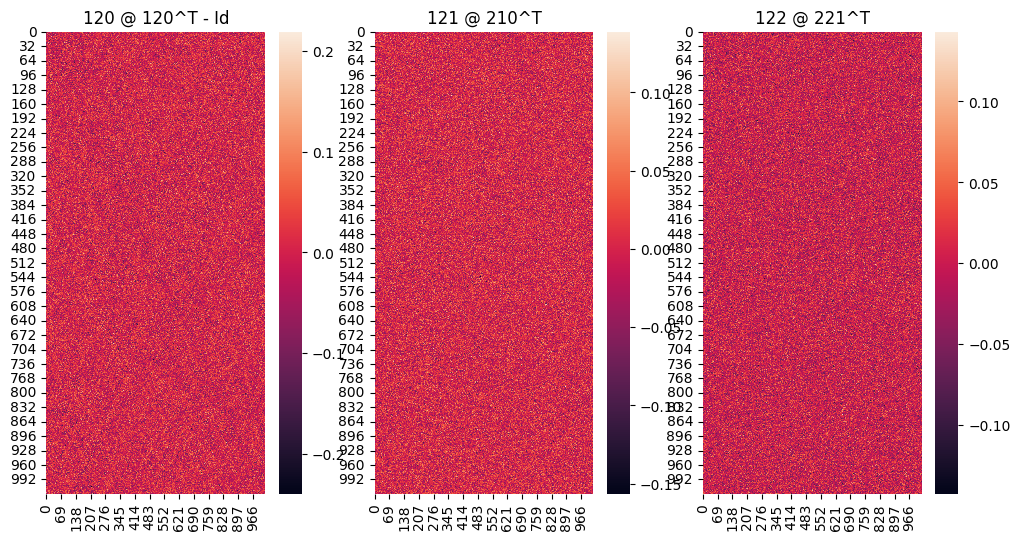

In [6]:
M = 2**10

H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, *keys_D = jax.random.split(key, 4)
D_1_uniform = jax.random.uniform(keys_D[0], (M,)) 
D_1_uniform = jnp.sqrt(3)*(2*D_1_uniform - 1)
D_2_uniform = jax.random.uniform(keys_D[1], (M,)) 
D_2_uniform = jnp.sqrt(3)*(2*D_2_uniform - 1)
D_3_uniform = jax.random.uniform(keys_D[2], (M,)) 
D_3_uniform = jnp.sqrt(3)*(2*D_3_uniform - 1)

B = H @ jnp.diag(D_1_uniform) 
B2 = H @ jnp.diag(D_2_uniform) 
B3 = H @ jnp.diag(D_3_uniform) 

plot_eigenvalues_circle([(B, "Hadamard_uniform B"), (B2, "Hadamard_uniform B2"), (B3, "Hadamard_uniform B3")])

corpus = [B, B2, B3]
plot_M1_M2T([('120', '120', 'Id'), ('121', '210'), ('122', '221')], corpus)